# Lab 3: Model Inversion Attacks

## Objectives
- Understand model inversion
- Reconstruct training data
- Implement gradient-based inversion
- Evaluate privacy risks

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Detect device (supports CUDA, Apple Silicon MPS, and CPU)
if torch.cuda.is_available():
    device = 'cuda'
elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
    device = 'mps'
else:
    device = 'cpu'

## Part 1: Model Inversion Attack

Step 0, Loss: 0.0972
Step 100, Loss: -3.1967
Step 200, Loss: -7.1072
Step 300, Loss: -11.3478
Step 400, Loss: -16.1444
Step 500, Loss: -21.0418
Step 600, Loss: -26.0234
Step 700, Loss: -30.8614
Step 800, Loss: -35.6204
Step 900, Loss: -40.2957


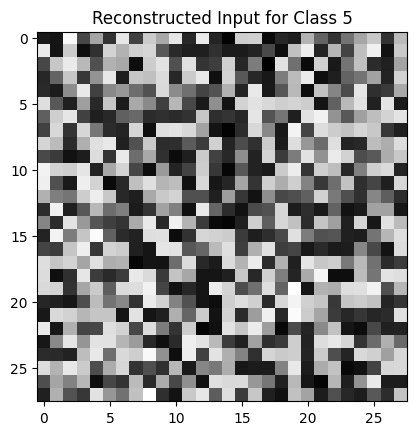

In [2]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        return self.fc(x.view(-1, 784))

model = SimpleClassifier().to(device)
model.eval()

def invert_model(model, target_class, steps=1000):
    """Reconstruct input that produces target class"""
    # Start with random input
    x = torch.randn(1, 784, requires_grad=True, device=device)
    optimizer = torch.optim.Adam([x], lr=0.01)
    
    for step in range(steps):
        optimizer.zero_grad()
        output = model(x)
        
        # Maximize probability of target class
        loss = -output[0, target_class]
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print(f'Step {step}, Loss: {loss.item():.4f}')
    
    return x.detach()

# Invert for class 5
reconstructed = invert_model(model, target_class=5)

# Visualize
plt.imshow(reconstructed.cpu().view(28, 28), cmap='gray')
plt.title('Reconstructed Input for Class 5')
plt.show()

## Exercise: Improve Reconstruction

Add regularization to make reconstructed images more realistic.

In [3]:
# Your code here
